In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2 as cv
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_face = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

In [3]:
pose_landmarks_names = [name.name for name in mp_holistic.PoseLandmark]
hand_landmarks_names = [name.name for name in mp_holistic.HandLandmark]

print("Count of pose landmarks: {}".format(len(pose_landmarks_names)))
print("Count of hand landmarks: {}".format(len(hand_landmarks_names)))

Count of pose landmarks: 33
Count of hand landmarks: 21


In [4]:
holistic = mp_holistic.Holistic()

In [5]:
def get_pose_columns():
    output = []
    
    for landmark_name in pose_landmarks_names:
        x_name = "Pose."+landmark_name+".x"
        y_name = "Pose."+landmark_name+".y"
        z_name = "Pose."+landmark_name+".z"
        v_name = "Pose."+landmark_name+".v"
        
        output.append(x_name)
        output.append(y_name)
        output.append(z_name)
        output.append(v_name)
    
    return output

In [6]:
def get_left_hand_columns():
    output = []
    
    for landmark_name in hand_landmarks_names:
        x_name = "Left_hand."+landmark_name+".x"
        y_name = "Left_hand."+landmark_name+".y"
        z_name = "Left_hand."+landmark_name+".z"
        v_name = "Left_hand."+landmark_name+".v"
        
        output.append(x_name)
        output.append(y_name)
        output.append(z_name)
        output.append(v_name)
    
    return output

In [7]:
def get_right_hand_columns():
    output = []
    
    for landmark_name in hand_landmarks_names:
        x_name = "Right_hand."+landmark_name+".x"
        y_name = "Right_hand."+landmark_name+".y"
        z_name = "Right_hand."+landmark_name+".z"
        v_name = "Right_hand."+landmark_name+".v"
        
        output.append(x_name)
        output.append(y_name)
        output.append(z_name)
        output.append(v_name)
    
    return output

In [8]:
def get_face_columns():
    output = []
    
    for landmark_name in range(468):
        x_name = "Face."+str(landmark_name)+".x"
        y_name = "Face."+str(landmark_name)+".y"
        z_name = "Face."+str(landmark_name)+".z"
        v_name = "Face."+str(landmark_name)+".v"
        
        output.append(x_name)
        output.append(y_name)
        output.append(z_name)
        output.append(v_name)
    
    return output

# Video to frames

In [9]:
!rm -r /dih4/dih4_2/hearai/alachowicz/pose-estimation/video-frames
!mkdir /dih4/dih4_2/hearai/alachowicz/pose-estimation/video-frames


video_path = "/dih4/dih4_2/hearai/data/spread_the_sign/data/100.mp4"
video = cv.VideoCapture(video_path)

success, frame = video.read()
counter = 0

pose_df = pd.DataFrame(columns=get_pose_columns())

while success:
    cv.imwrite("/dih4/dih4_2/hearai/alachowicz/pose-estimation/video-frames/{}.jpg".format(counter), frame)
    success, frame = video.read()
    counter += 1

# Get landmarks from image and save into DataFrame

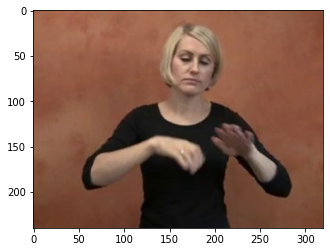

In [10]:
img_path = "/dih4/dih4_2/hearai/alachowicz/pose-estimation/frames-to-test/97.jpg"
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

In [11]:
results = holistic.process(img)
annotated_img = img.copy()

In [12]:
mp_drawing.draw_landmarks(annotated_img, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_img, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_img, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
mp_drawing.draw_landmarks(annotated_img, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

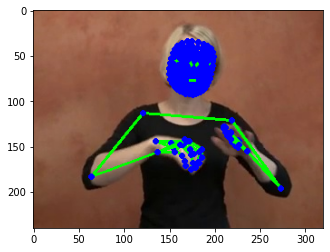

In [13]:
plt.imshow(annotated_img)

In [14]:
face_landmarks = results.face_landmarks.landmark
pose_landmarks = results.pose_landmarks.landmark
left_hand_landmarks = results.left_hand_landmarks.landmark
right_hand_landmarks = results.right_hand_landmarks.landmark

In [15]:
img_height, img_width, _ = img.shape
print("Height: {}".format(img_height))
print("Width: {}".format(img_width))

Height: 240
Width: 320


## Extract pose

In [16]:
pose_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks]).flatten()
pose_row = np.expand_dims(pose_row, 0)

In [17]:
pose_df = pd.DataFrame(pose_row, columns=get_pose_columns())
pose_df.head()

,Pose.NOSE.x,Pose.NOSE.y,Pose.NOSE.z,Pose.NOSE.v,Pose.LEFT_EYE_INNER.x,Pose.LEFT_EYE_INNER.y,Pose.LEFT_EYE_INNER.z,Pose.LEFT_EYE_INNER.v,Pose.LEFT_EYE.x,Pose.LEFT_EYE.y,...,Pose.RIGHT_HEEL.z,Pose.RIGHT_HEEL.v,Pose.LEFT_FOOT_INDEX.x,Pose.LEFT_FOOT_INDEX.y,Pose.LEFT_FOOT_INDEX.z,Pose.LEFT_FOOT_INDEX.v,Pose.RIGHT_FOOT_INDEX.x,Pose.RIGHT_FOOT_INDEX.y,Pose.RIGHT_FOOT_INDEX.z,Pose.RIGHT_FOOT_INDEX.v
0,0.555193,0.270152,-0.478733,1.0,0.575868,0.2315,-0.425141,1.0,0.588802,0.233899,...,0.415278,0.000055,0.585353,1.959445,0.000817,0.000027,0.440845,1.95218,0.073709,0.000017


In [18]:
# Test

print(pose_landmarks_names[11])
print("\n")
print(pose_df.loc[0, "Pose.LEFT_SHOULDER.x"])
print(pose_df.loc[0, "Pose.LEFT_SHOULDER.y"])
print("\n")
print(pose_landmarks[11])

LEFT_SHOULDER


0.6863836050033569
0.5065434575080872


x: 0.6863836050033569
y: 0.5065434575080872
z: 0.046227145940065384
visibility: 0.9999954700469971



## Extract left hand

In [19]:
left_hand_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks]).flatten()
left_hand_row = np.expand_dims(left_hand_row, 0)

In [20]:
left_hand_df = pd.DataFrame(left_hand_row, columns=get_left_hand_columns())
left_hand_df.head()

,Left_hand.WRIST.x,Left_hand.WRIST.y,Left_hand.WRIST.z,Left_hand.WRIST.v,Left_hand.THUMB_CMC.x,Left_hand.THUMB_CMC.y,Left_hand.THUMB_CMC.z,Left_hand.THUMB_CMC.v,Left_hand.THUMB_MCP.x,Left_hand.THUMB_MCP.y,...,Left_hand.PINKY_PIP.z,Left_hand.PINKY_PIP.v,Left_hand.PINKY_DIP.x,Left_hand.PINKY_DIP.y,Left_hand.PINKY_DIP.z,Left_hand.PINKY_DIP.v,Left_hand.PINKY_TIP.x,Left_hand.PINKY_TIP.y,Left_hand.PINKY_TIP.z,Left_hand.PINKY_TIP.v
0,0.707751,0.632928,-0.000013,0.0,0.697597,0.624556,-0.03732,0.0,0.687368,0.604228,...,-0.144381,0.0,0.710519,0.602774,-0.172527,0.0,0.708594,0.606088,-0.192424,0.0


In [21]:
# Test

print(hand_landmarks_names[11])
print("\n")
print(left_hand_df.loc[0, "Left_hand.MIDDLE_FINGER_DIP.x"])
print(left_hand_df.loc[0, "Left_hand.MIDDLE_FINGER_DIP.y"])
print("\n")
print(left_hand_landmarks[11])

MIDDLE_FINGER_DIP


0.6622032523155212
0.5465359091758728


x: 0.6622032523155212
y: 0.5465359091758728
z: -0.1834726631641388



## Extract right hand

In [22]:
right_hand_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks]).flatten()
right_hand_row = np.expand_dims(right_hand_row, 0)

In [23]:
right_hand_df = pd.DataFrame(right_hand_row, columns=get_right_hand_columns())
right_hand_df.head()

,Right_hand.WRIST.x,Right_hand.WRIST.y,Right_hand.WRIST.z,Right_hand.WRIST.v,Right_hand.THUMB_CMC.x,Right_hand.THUMB_CMC.y,Right_hand.THUMB_CMC.z,Right_hand.THUMB_CMC.v,Right_hand.THUMB_MCP.x,Right_hand.THUMB_MCP.y,...,Right_hand.PINKY_PIP.z,Right_hand.PINKY_PIP.v,Right_hand.PINKY_DIP.x,Right_hand.PINKY_DIP.y,Right_hand.PINKY_DIP.z,Right_hand.PINKY_DIP.v,Right_hand.PINKY_TIP.x,Right_hand.PINKY_TIP.y,Right_hand.PINKY_TIP.z,Right_hand.PINKY_TIP.v
0,0.424535,0.602337,-0.000061,0.0,0.475244,0.609403,0.038965,0.0,0.516111,0.620815,...,-0.107053,0.0,0.523277,0.695819,-0.106135,0.0,0.525793,0.716633,-0.101722,0.0


In [24]:
# Test

print(hand_landmarks_names[18])
print("\n")
print(right_hand_df.loc[0, "Right_hand.PINKY_PIP.x"])
print(right_hand_df.loc[0, "Right_hand.PINKY_PIP.y"])
print("\n")
print(right_hand_landmarks[18])

PINKY_PIP


0.5139833092689514
0.6679089069366455


x: 0.5139833092689514
y: 0.6679089069366455
z: -0.10705284774303436



## Extract face

In [25]:
face_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face_landmarks]).flatten()
face_row = np.expand_dims(face_row, 0)

In [26]:
face_df = pd.DataFrame(face_row, columns=get_face_columns())
face_df.head()

,Face.0.x,Face.0.y,Face.0.z,Face.0.v,Face.1.x,Face.1.y,Face.1.z,Face.1.v,Face.2.x,Face.2.y,...,Face.465.z,Face.465.v,Face.466.x,Face.466.y,Face.466.z,Face.466.v,Face.467.x,Face.467.y,Face.467.z,Face.467.v
0,0.552425,0.31333,-0.019238,0.0,0.557498,0.283633,-0.031585,0.0,0.554423,0.294188,...,0.00115,0.0,0.599468,0.240757,0.01745,0.0,0.60307,0.237436,0.018263,0.0


In [27]:
# Test

print("5")
print("\n")
print(face_df.loc[0, "Face.5.x"])
print(face_df.loc[0, "Face.5.y"])
print("\n")
print(face_landmarks[5])

5


0.5596193075180054
0.2613942325115204


x: 0.5596193075180054
y: 0.2613942325115204
z: -0.030065089464187622



# Testing on video

In [28]:
video_path = "/dih4/dih4_2/hearai/data/spread_the_sign/data/100.mp4"
video = cv.VideoCapture(video_path)

success, frame = video.read()
counter = 0

face_columns = get_face_columns()
pose_columns = get_pose_columns()
left_hand_columns = get_left_hand_columns()
right_hand_columns = get_right_hand_columns()

video_face_df = pd.DataFrame(columns=face_columns)
video_pose_df = pd.DataFrame(columns=pose_columns)
video_left_hand_df = pd.DataFrame(columns=left_hand_columns)
video_right_hand_df = pd.DataFrame(columns=right_hand_columns)


while success:
    results = holistic.process(frame)
    # Extract face
    try:
        face_landmarks = results.face_landmarks.landmark
        
        face_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face_landmarks]).flatten()
        face_row = np.expand_dims(face_row, 0)
        
        video_face_df = video_face_df.append(pd.DataFrame(face_row, columns=face_columns), ignore_index=True)
    except:
        nan_df = pd.DataFrame([[np.nan for _ in range(len(face_columns))]], columns=face_columns)
        video_face_df = video_face_df.append(nan_df, ignore_index=True)
        
    
    # Extract pose
    try:
        pose_landmarks = results.pose_landmarks.landmark
        
        pose_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks]).flatten()
        pose_row = np.expand_dims(pose_row, 0)

        video_pose_df = video_pose_df.append(pd.DataFrame(pose_row, columns=pose_columns), ignore_index=True)       
    except:
        nan_df = pd.DataFrame([[np.nan for _ in range(len(pose_columns))]], columns=pose_columns)
        video_pose_df = video_pose_df.append(nan_df, ignore_index=True)
        
    
    # Extract left hand
    try:
        left_hand_landmarks = results.left_hand_landmarks.landmark
        
        left_hand_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left_hand_landmarks]).flatten()
        left_hand_row = np.expand_dims(left_hand_row, 0)
        
        video_left_hand_df = video_left_hand_df.append(pd.DataFrame(left_hand_row, columns=left_hand_columns), ignore_index=True)
    except:
        nan_df = pd.DataFrame([[np.nan for _ in range(len(left_hand_columns))]], columns=left_hand_columns)
        video_left_hand_df = video_left_hand_df.append(nan_df)
        
    
    # Extract right hand
    try:
        right_hand_landmarks = results.right_hand_landmarks.landmark
        
        right_hand_row = np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right_hand_landmarks]).flatten()
        right_hand_row = np.expand_dims(right_hand_row, 0)
        
        video_right_hand_df = video_right_hand_df.append(pd.DataFrame(right_row, columns=right_hand_columns), ignore_index=True)
    except:
        nan_df = pd.DataFrame([[np.nan for _ in range(len(right_hand_columns))]], columns=right_hand_columns)
        video_right_hand_df = video_right_hand_df.append(nan_df)
        
    success, frame = video.read()
    counter += 1

In [29]:
dfs = [video_face_df, video_pose_df, video_left_hand_df, video_right_hand_df]
dfs_filenames = ["face.csv", "pose.csv", "left_hand.csv", "right_hand.csv"]

In [30]:
for i in range(len(dfs)):
    df = dfs[i]
    filename = dfs_filenames[i]
    path = "/dih4/dih4_2/hearai/alachowicz/pose-estimation/output-files/100/"+filename
    
    df.to_csv(path)